<a href="https://colab.research.google.com/github/dnoraz/BairesDEV-DIO-ReducaoDeDimensionalidade/blob/master/Redu%C3%A7%C3%A3oDeDimensionalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

In [ ]:
# Baixar a imagem Lena da web
lena_url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
response = requests.get(lena_url)
lena_image_path = "lena.png"

In [ ]:
# Salva a imagem baixada
with open(lena_image_path, 'wb') as f:
    f.write(response.content)

In [ ]:
def process_image(image_path, output_grayscale_path, output_binary_path, threshold=128):
    """
    Transforma uma imagem colorida em níveis de cinza e binarizada.

    :param image_path: Caminho da imagem de entrada.
    :param output_grayscale_path: Caminho para salvar a imagem em tons de cinza.
    :param output_binary_path: Caminho para salvar a imagem binarizada.
    :param threshold: Valor de limiar para binarização (padrão: 128).
    """
    # Abre a imagem colorida  # Indented this line to align with the function body
    image = Image.open(image_path)

     # Converte para tons de cinza
    grayscale_image = image.convert("L")  # 'L' para grayscale
    grayscale_image.save(output_grayscale_path)
    print(f"Imagem em tons de cinza salva em: {output_grayscale_path}")

     # Binarização
    binary_image = grayscale_image.point(lambda x: 255 if x > threshold else 0, '1')
    binary_image.save(output_binary_path)
    print(f"Imagem binarizada salva em: {output_binary_path}")

In [ ]:
# Processar a imagem Lena
# Define paths for the output files
grayscale_image_path = "lena_grayscale.png"
binary_image_path = "lena_binary.png"
# Call process_image function with all required arguments
process_image(lena_image_path, grayscale_image_path, binary_image_path)


Imagem em tons de cinza salva em: lena_grayscale.png
Imagem binarizada salva em: lena_binary.png


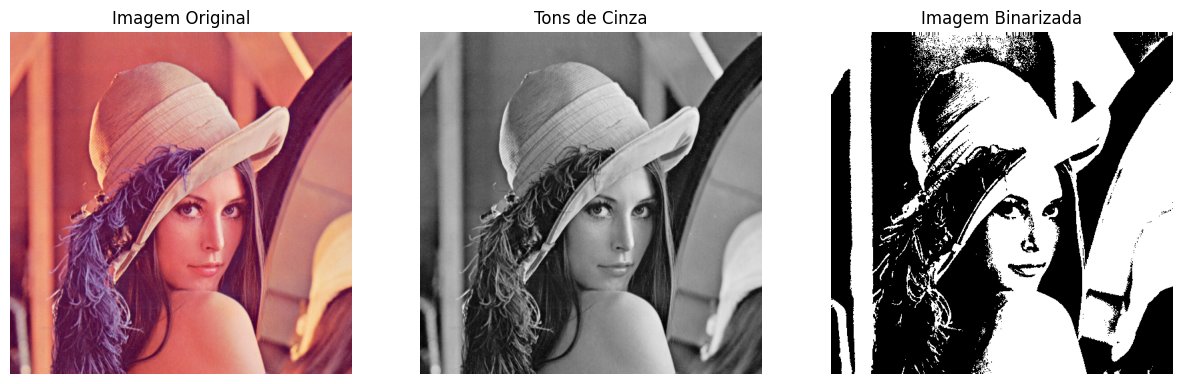

In [ ]:
# Exibir as imagens
plt.figure(figsize=(15, 5))

# Carrega a imagem original # Load the original image
original_image = Image.open(lena_image_path)

# Imagem original
plt.subplot(1, 3, 1)
plt.imshow(original_image) # Now original_image is defined
plt.title("Imagem Original")
plt.axis("off")

# Imagem em tons de cinza
plt.subplot(1, 3, 2)
grayscale_image = Image.open(grayscale_image_path) # Load grayscale image for display
plt.imshow(grayscale_image, cmap="gray")
plt.title("Tons de Cinza")
plt.axis("off")

# Imagem binarizada
plt.subplot(1, 3, 3)
binary_image = Image.open(binary_image_path) # Load binary image for display
plt.imshow(binary_image, cmap="gray")
plt.title("Imagem Binarizada")
plt.axis("off")

plt.show()